<b>Nama<b>: Muhammad Alfhi Saputra<br> 
<b>NIP<b>: DS0120<br>
<b>Kelas<b> : DS-01

### Import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score

### Read data

In [2]:
url = "https://raw.githubusercontent.com/alfhi24/DTI_DS01/main/modul%205/bank.csv"
df = pd.read_csv(url)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
# Check mising value
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
# Cek kolom yang bertipe kategorikal (object)
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


### Encoding menggunakan label encoder

In [7]:
le = LabelEncoder()
df_encode = df.copy()
for col in df.select_dtypes(include='object').columns:
    df_encode[col] = le.fit_transform(df_encode[col])
df_encode.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


### Split data train dan test

In [8]:
#  X sebagai features dan Y sebagai class/target

X = df_encode.drop(['deposit'], axis=1)
Y = df_encode['deposit']
X_train, X_test, y_train, y_test  = train_test_split(X , Y, shuffle = True, test_size=0.25, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8371, 16)
(2791, 16)
(8371,)
(2791,)


### Klasifikasi menggunakan Decision Tree

In [9]:
# Import Module
from sklearn import tree

# Modeling Decision Tree
dtc = tree.DecisionTreeClassifier(min_impurity_decrease=0.01)
dtc.fit(X_train, y_train)

# Predict to Test Data 
y_pred = dtc.predict(X_test)

C:\anaconda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


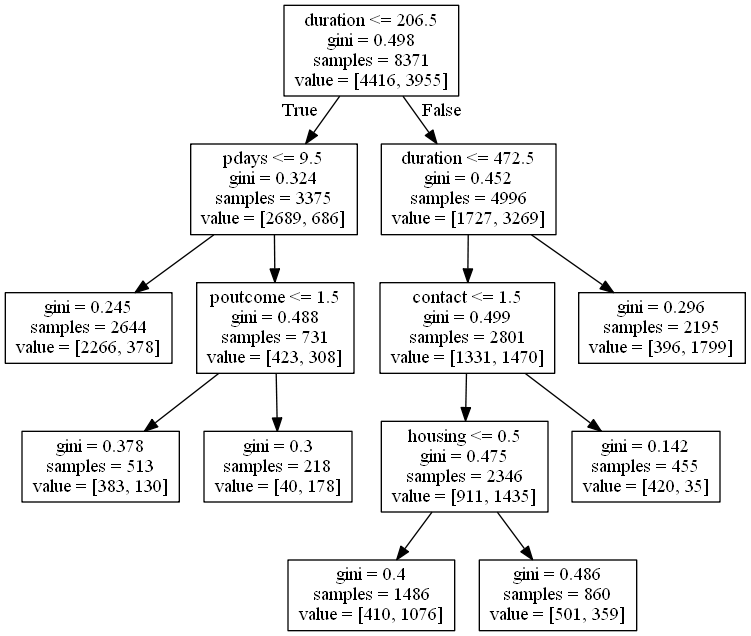

In [10]:
# Visualize Tree
import sys
sys.path.append('C:/Users/usrname/AppData/Local/Continuum/anaconda3/Library/bin/graphviz/')

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot

dot_data = StringIO()  
tree.export_graphviz(dtc, out_file=dot_data, feature_names=X.columns)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [11]:
# Evaluasi model

print("Report : \n", classification_report(y_test, y_pred))
print("Accuracy : ",accuracy_score(y_test,y_pred))
accs = []
accs.append(accuracy_score(y_test, y_pred))

Report : 
               precision    recall  f1-score   support

           0       0.79      0.78      0.78      1457
           1       0.76      0.77      0.77      1334

    accuracy                           0.78      2791
   macro avg       0.78      0.78      0.78      2791
weighted avg       0.78      0.78      0.78      2791

Accuracy :  0.7757076316732354


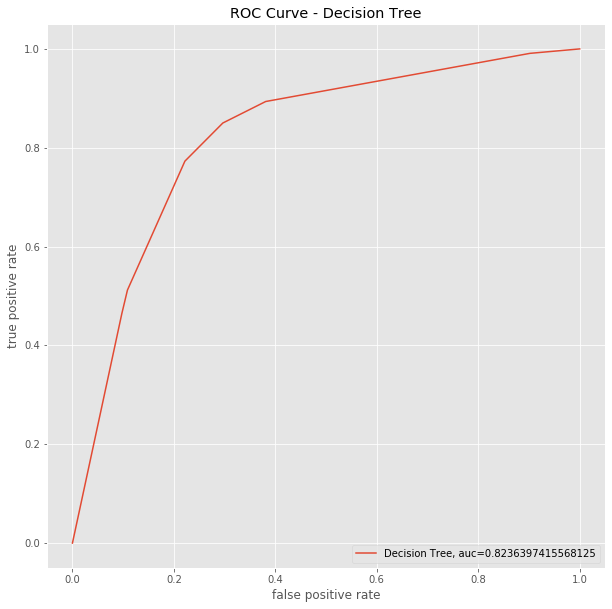

In [12]:
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# Set Size and Style
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
y_pred_dtc_proba = dtc.predict_proba(X_test)[::,1]
fprdtc, tprdtc, _ = metrics.roc_curve(y_test,  y_pred_dtc_proba)
aucdtc = metrics.roc_auc_score(y_test, y_pred_dtc_proba)
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.title('ROC Curve - Decision Tree')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

### Klasifikasi menggunakan Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print("Report : \n", classification_report(y_test, y_pred))
print("Accuracy : ",accuracy_score(y_test,y_pred))
accs.append(accuracy_score(y_test, y_pred))

Report : 
               precision    recall  f1-score   support

           0       0.80      0.71      0.75      1457
           1       0.72      0.80      0.76      1334

    accuracy                           0.75      2791
   macro avg       0.76      0.75      0.75      2791
weighted avg       0.76      0.75      0.75      2791

Accuracy :  0.7527767825152275


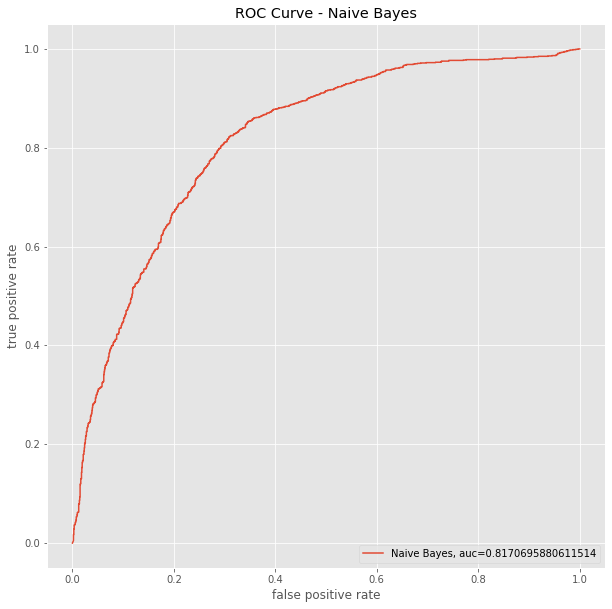

In [14]:
# ROC Curve
y_pred_gnb_proba = gnb.predict_proba(X_test)[::,1]
fprgnb, tprgnb, _ = metrics.roc_curve(y_test,  y_pred_gnb_proba)
aucgnb = metrics.roc_auc_score(y_test, y_pred_gnb_proba)
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.title('ROC Curve - Naive Bayes')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

### Klasifikasi menggunakan K-Nearest Neighbor

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Report : \n", classification_report(y_test, y_pred))
print("Accuracy : ",accuracy_score(y_test,y_pred))
accs.append(accuracy_score(y_test, y_pred))

Report : 
               precision    recall  f1-score   support

           0       0.75      0.78      0.76      1457
           1       0.75      0.72      0.73      1334

    accuracy                           0.75      2791
   macro avg       0.75      0.75      0.75      2791
weighted avg       0.75      0.75      0.75      2791

Accuracy :  0.7499104263704766


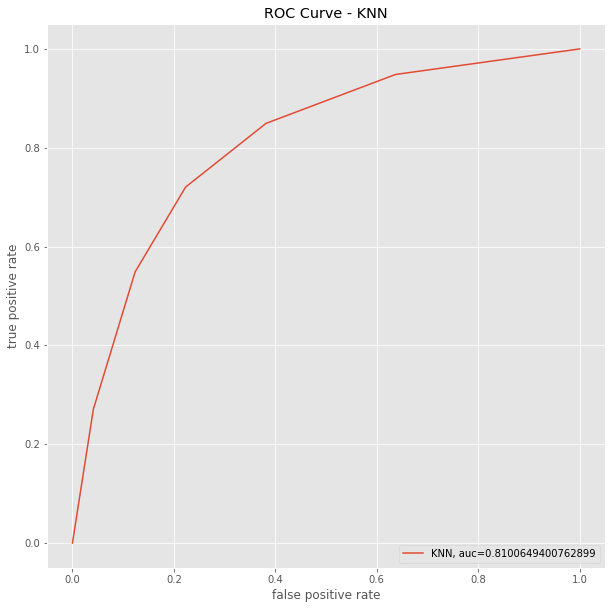

In [16]:
# ROC Curve
y_pred_knn_proba = knn.predict_proba(X_test)[::,1]
fprknn, tprknn, _ = metrics.roc_curve(y_test,  y_pred_knn_proba)
aucknn = metrics.roc_auc_score(y_test, y_pred_knn_proba)
plt.plot(fprknn,tprknn,label="KNN, auc="+str(aucknn))
plt.title('ROC Curve - KNN')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

### Klasifikasi menggunakan Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Report : \n", classification_report(y_test, y_pred))
print("Accuracy : ",accuracy_score(y_test,y_pred))
accs.append(accuracy_score(y_test, y_pred))

Report : 
               precision    recall  f1-score   support

           0       0.86      0.81      0.83      1457
           1       0.80      0.86      0.83      1334

    accuracy                           0.83      2791
   macro avg       0.83      0.83      0.83      2791
weighted avg       0.83      0.83      0.83      2791

Accuracy :  0.8326764600501613


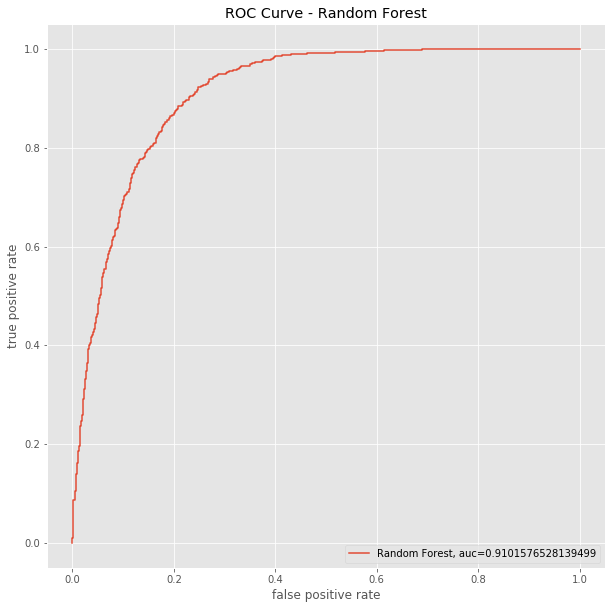

In [18]:
# ROC Curve
y_pred_rf_proba = rf.predict_proba(X_test)[::,1]
fprrf, tprrf, _ = metrics.roc_curve(y_test,  y_pred_rf_proba)
aucrf = metrics.roc_auc_score(y_test, y_pred_rf_proba)
plt.plot(fprrf,tprrf,label="Random Forest, auc="+str(aucrf))
plt.title('ROC Curve - Random Forest')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

In [19]:
# Perbandingan Akurasi
models = ['Decision Tree','Naive Bayes','K-Nearest Neighbor','Random Forest']
result_df = pd.DataFrame(list(zip(models, accs)), columns =['Model', 'Accuracy']) 
result_df

,Model,Accuracy
0,Decision Tree,0.775708
1,Naive Bayes,0.752777
2,K-Nearest Neighbor,0.749910
3,Random Forest,0.832676


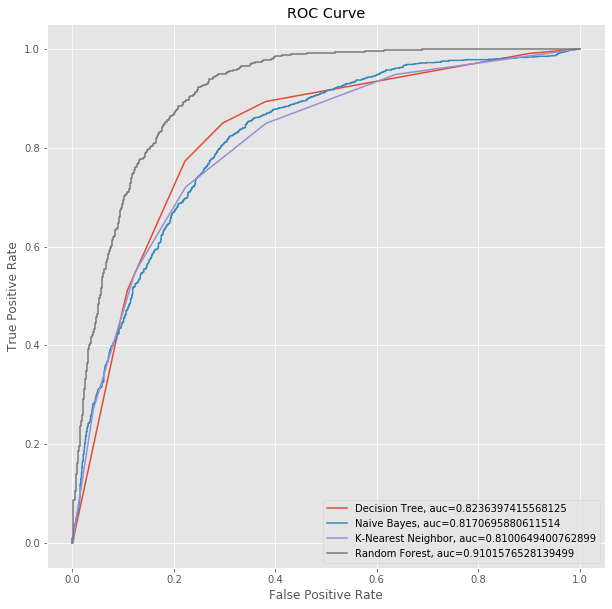

In [20]:
# Comparing ROC Curve
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.plot(fprknn,tprknn,label="K-Nearest Neighbor, auc="+str(aucknn))
plt.plot(fprrf,tprrf,label="Random Forest, auc="+str(aucrf))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()